In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## 포켓몬

In [3]:
pokemon = pd.read_csv('data\Pokemon.csv')
pokemon.shape

(800, 13)

In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [11]:
g = nx.Graph()
g = nx.from_pandas_edgelist(pokemon[:100], source='Name', target='Type 2')
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 111
Number of edges: 100
Average degree:   1.8018


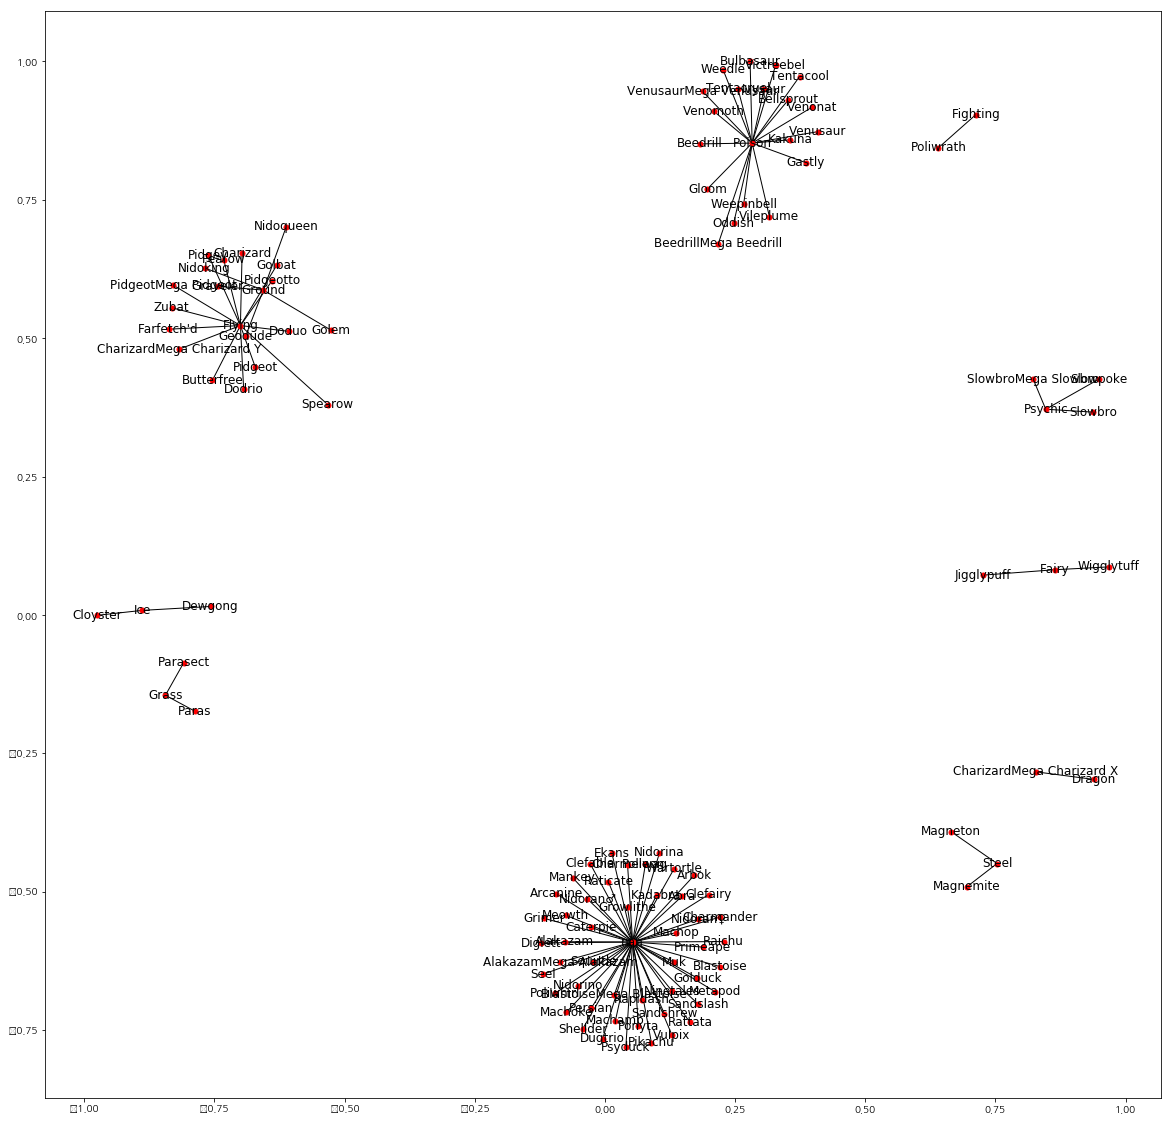

In [12]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k=0.15)
nx.draw_networkx(g,pos,node_size=25, node_color='red')
plt.show()

In [21]:
links = pd.read_csv('data\stack_network_links.csv')
nodes = pd.read_csv('data\stack_network_nodes.csv')

In [22]:
links.head()

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925


In [23]:
nodes.head()

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14


In [24]:
nodes.clomns = ['source', 'target', 'value']

C:\Users\jeeyun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


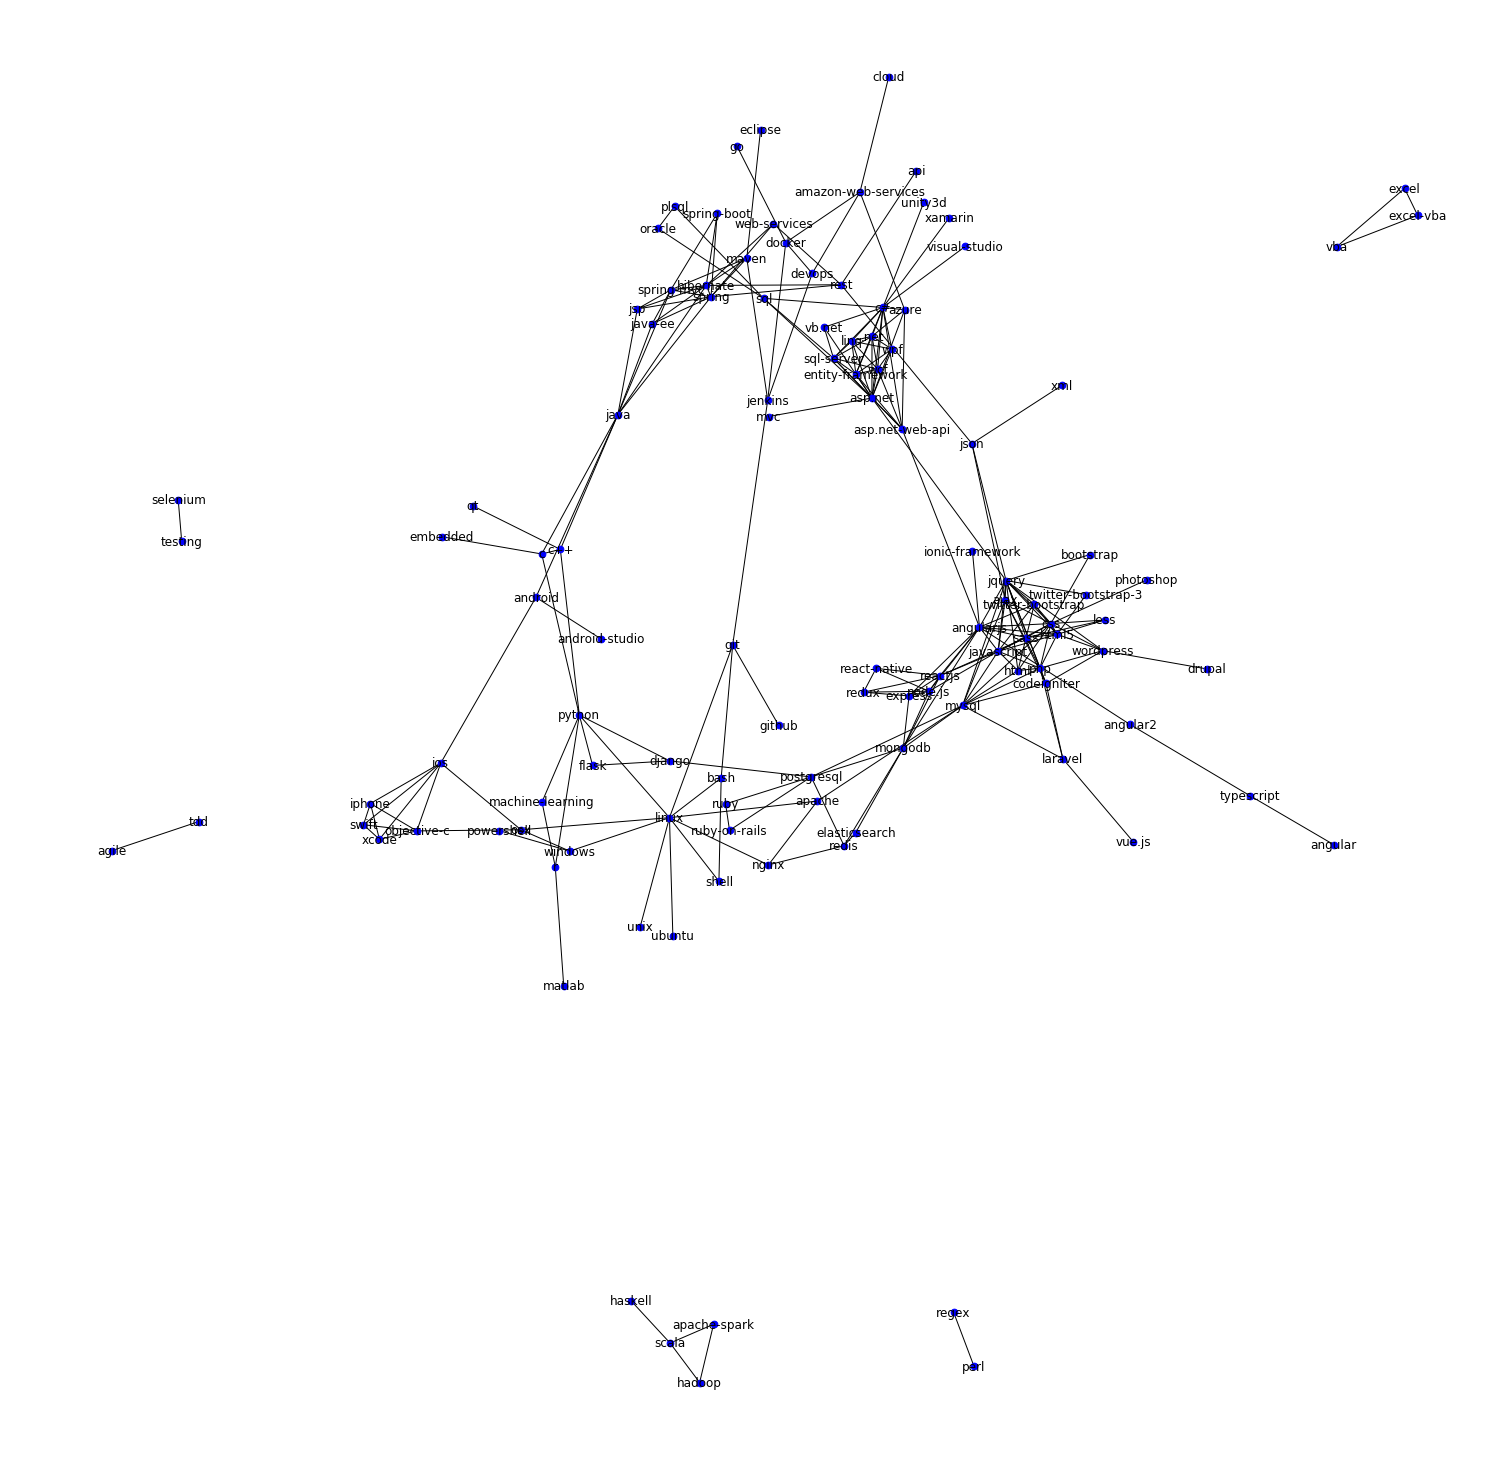

In [30]:
g = nx.from_pandas_edgelist(links, source='source', target='target')
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k=0.15)
nx.draw(g, pos, node_size=45, node_color='blue', with_labels=True)

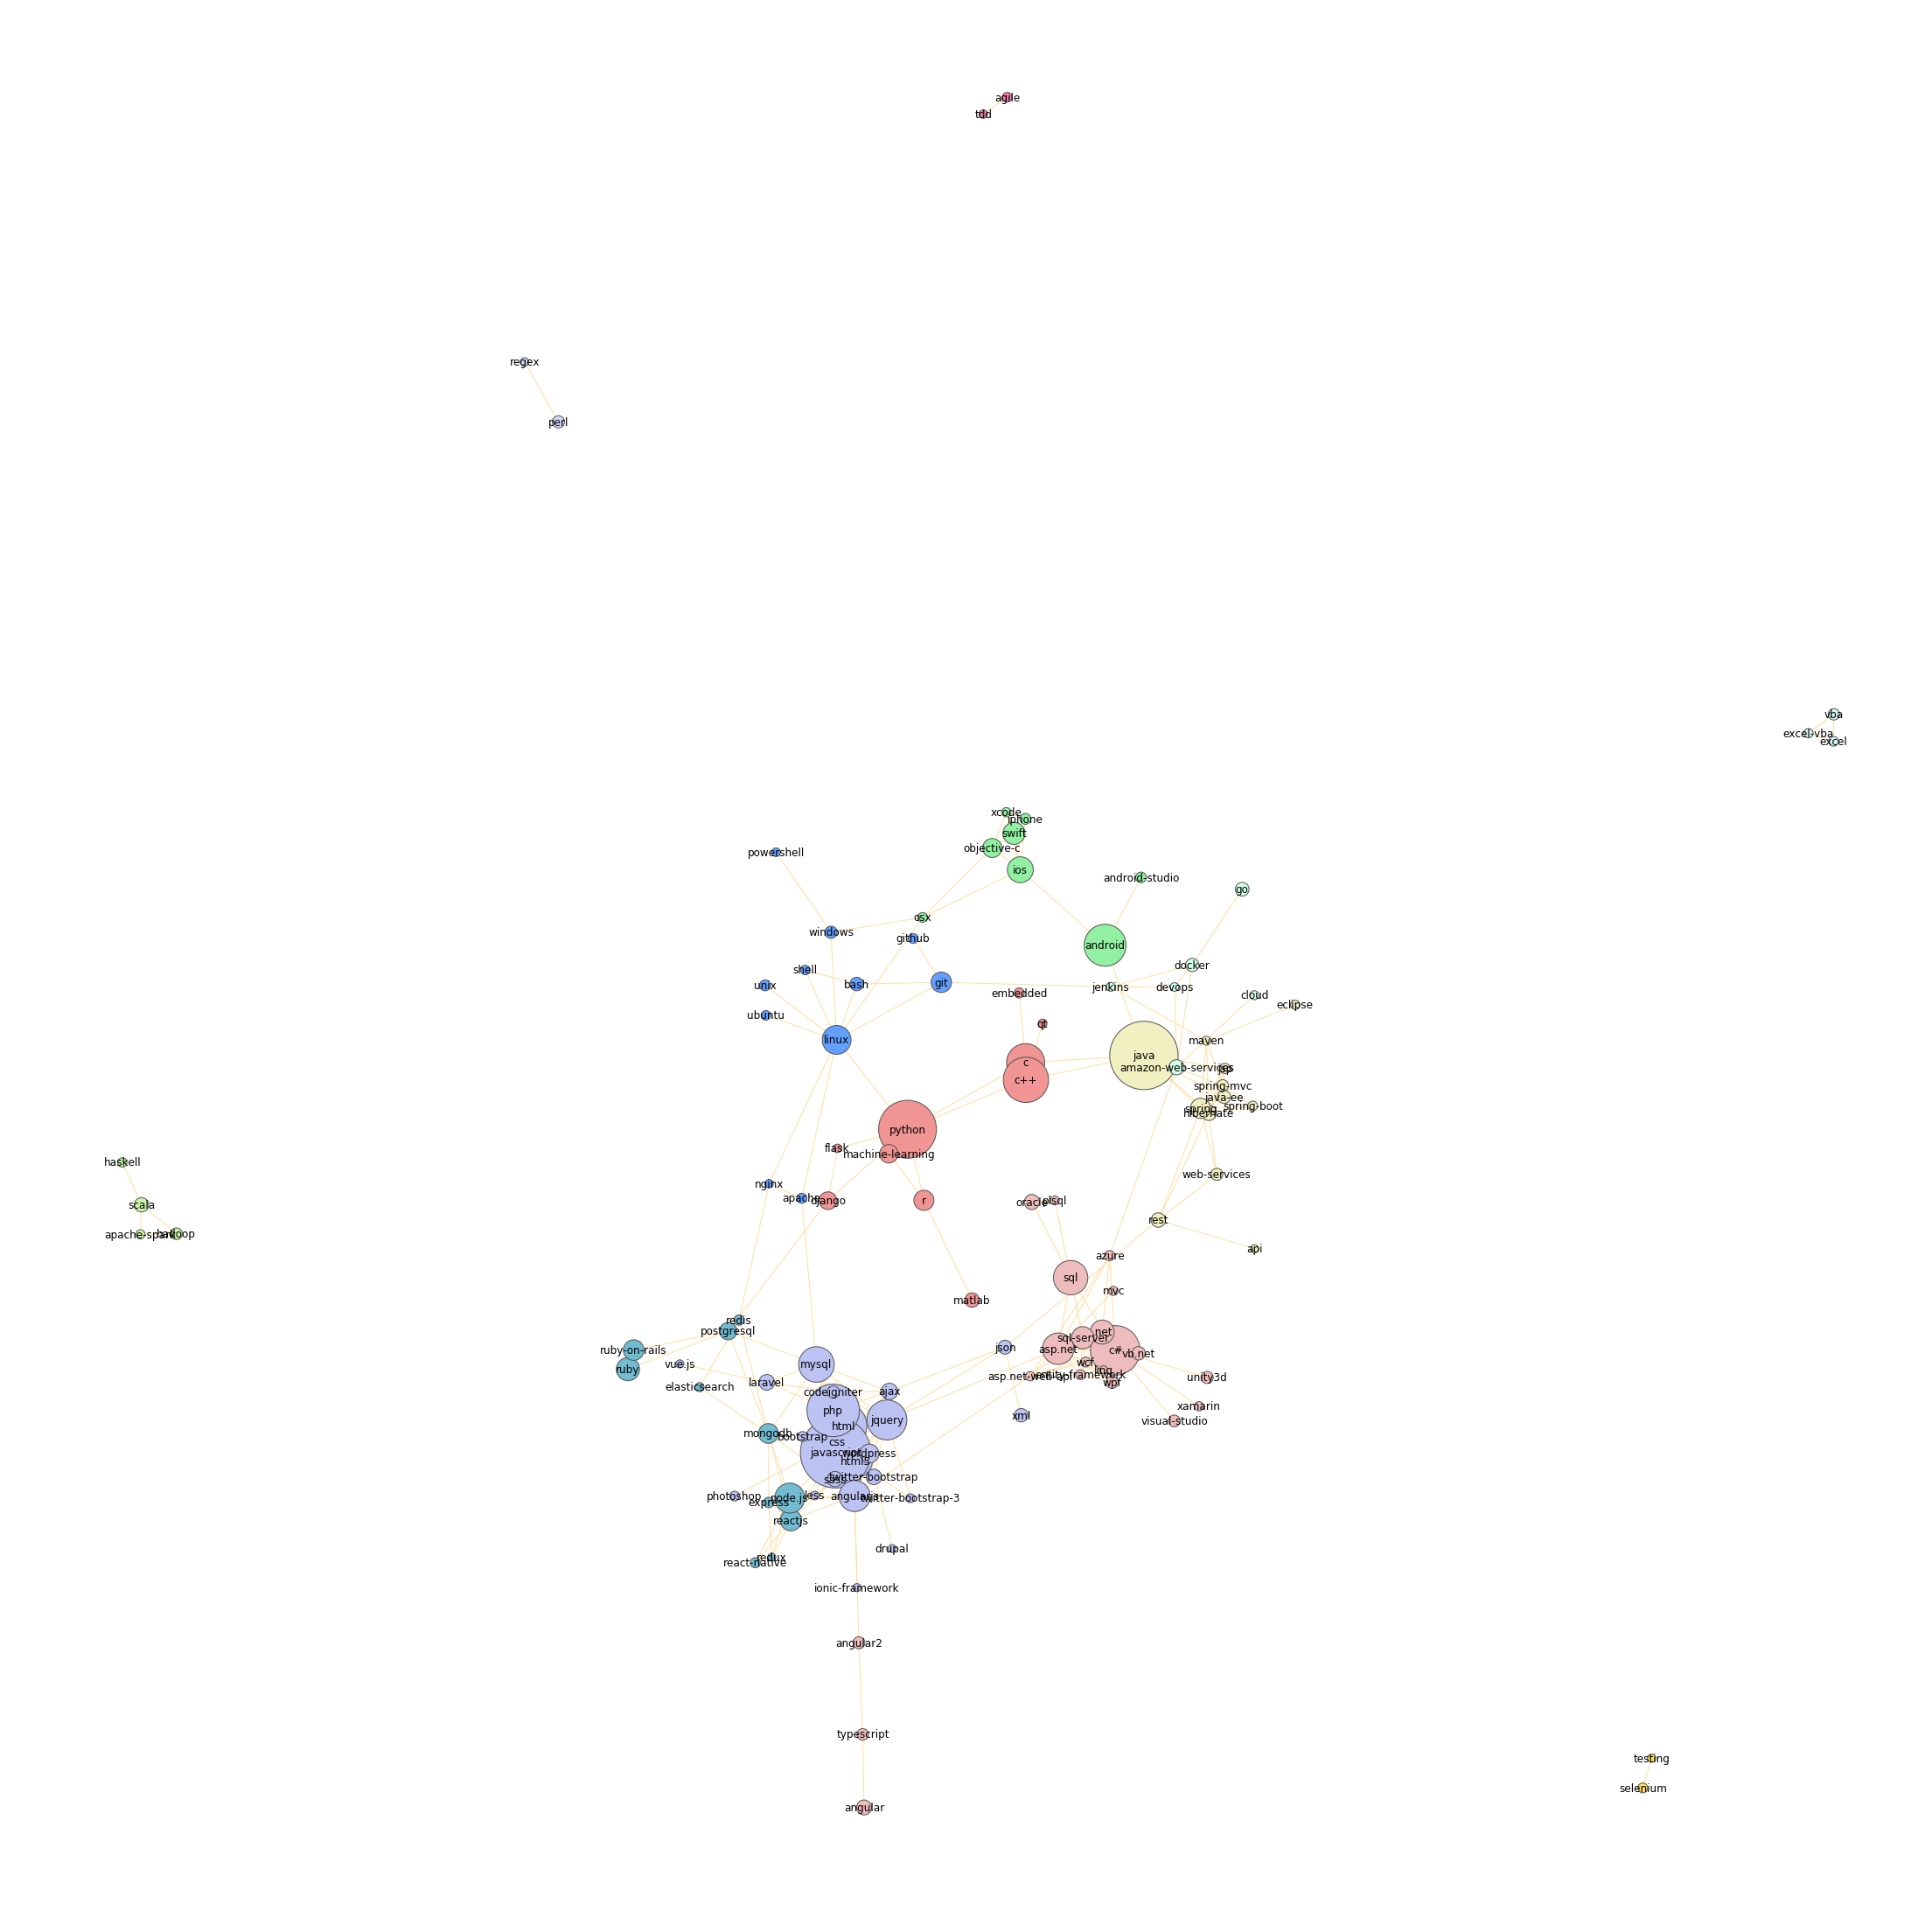

In [38]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

df_nodes = pd.read_csv('data/stack_network_nodes.csv')
df_edges = pd.read_csv('data/stack_network_links.csv')

G = nx.Graph()

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(30,30))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()
